In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore") 

In [81]:
df = pd.read_csv("weight.csv" , names=['Index', 'Date', 'Weight'])
df.head()

,Index,Date,Weight
0,NaN,0,1
1,0.0,3-Jun-2024,80 kg
2,1.0,4-Jun-2024,NaN
3,2.0,5-Jun-2024,NaN
4,3.0,6-Jun-2024,NaN


In [82]:
df.shape

(70, 3)

In [83]:
df1 = df

In [84]:
df[df.duplicated()]

,Index,Date,Weight


In [85]:
df.dtypes

Index     float64
Date       object
Weight     object
dtype: object

In [86]:
df.drop(columns="Index",inplace=True)


In [87]:
df["Weight"].replace("NA",pd.NA,inplace = True)

In [88]:
df["Weight"]= df["Weight"].str.replace("kg","").astype(float)

In [89]:
df.reset_index(drop=True,inplace= True)

In [90]:
df.drop(0,inplace=True)  


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    69 non-null     object 
 1   Weight  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [92]:
df.head()

,Date,Weight
1,3-Jun-2024,80.0
2,4-Jun-2024,NaN
3,5-Jun-2024,NaN
4,6-Jun-2024,NaN
5,7-Jun-2024,NaN


In [93]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

In [94]:
df.head()

,Date,Weight
1,2024-06-03,80.0
2,2024-06-04,NaN
3,2024-06-05,NaN
4,2024-06-06,NaN
5,2024-06-07,NaN


In [95]:
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [96]:
df.head()

,Date,Weight,Days,year,month
1,2024-06-03,80.0,0,2024,6
2,2024-06-04,NaN,1,2024,6
3,2024-06-05,NaN,2,2024,6
4,2024-06-06,NaN,3,2024,6
5,2024-06-07,NaN,4,2024,6


In [97]:
df["Days"] = pd.Index(range(1, len(df)+1))
df.head()

,Date,Weight,Days,year,month
1,2024-06-03,80.0,1,2024,6
2,2024-06-04,NaN,2,2024,6
3,2024-06-05,NaN,3,2024,6
4,2024-06-06,NaN,4,2024,6
5,2024-06-07,NaN,5,2024,6


<AxesSubplot: xlabel='Days', ylabel='Weight'>

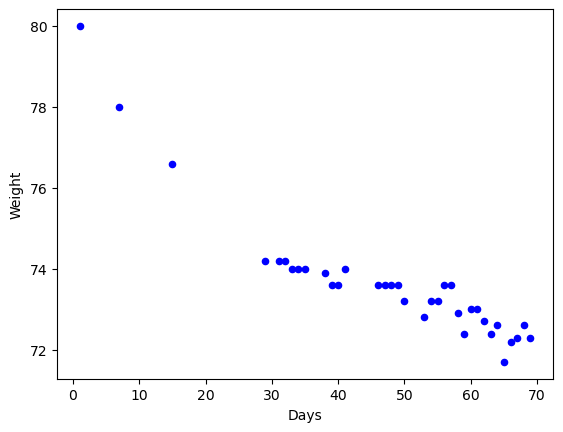

In [98]:
df.plot.scatter(x="Days", y="Weight", c='blue')

In [99]:
df.head()

,Date,Weight,Days,year,month
1,2024-06-03,80.0,1,2024,6
2,2024-06-04,NaN,2,2024,6
3,2024-06-05,NaN,3,2024,6
4,2024-06-06,NaN,4,2024,6
5,2024-06-07,NaN,5,2024,6


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    69 non-null     datetime64[ns]
 1   Weight  35 non-null     float64       
 2   Days    69 non-null     int64         
 3   year    69 non-null     int64         
 4   month   69 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.8 KB


In [101]:
df.isna().sum()

Date       0
Weight    34
Days       0
year       0
month      0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    69 non-null     datetime64[ns]
 1   Weight  35 non-null     float64       
 2   Days    69 non-null     int64         
 3   year    69 non-null     int64         
 4   month   69 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.8 KB


In [103]:
df.dtypes

Date      datetime64[ns]
Weight           float64
Days               int64
year               int64
month              int64
dtype: object

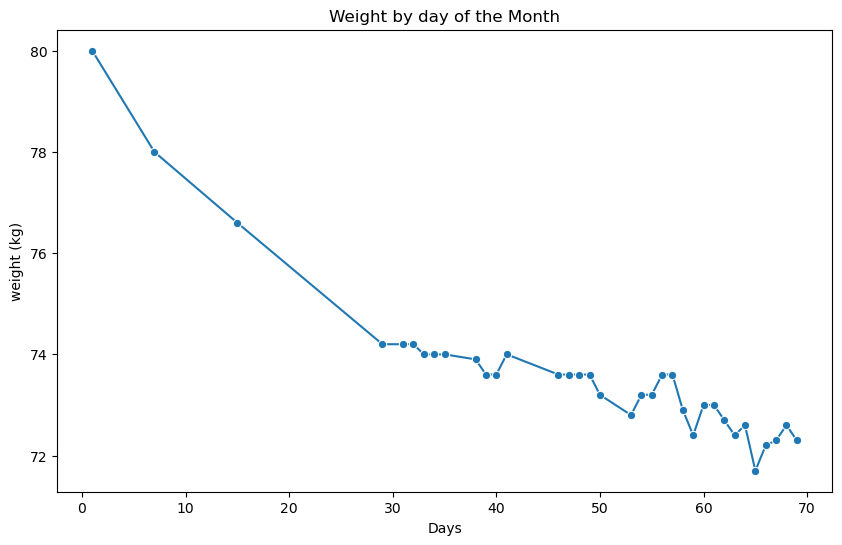

In [104]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Days",y="Weight",data=df,marker="o")
plt.title("Weight by day of the Month")
plt.ylabel("weight (kg)")
plt.show()

In [105]:
df.head()

,Date,Weight,Days,year,month
1,2024-06-03,80.0,1,2024,6
2,2024-06-04,NaN,2,2024,6
3,2024-06-05,NaN,3,2024,6
4,2024-06-06,NaN,4,2024,6
5,2024-06-07,NaN,5,2024,6


In [106]:

ordinal_encoder = OrdinalEncoder()
df['Date_Ordinal'] = ordinal_encoder.fit_transform(df[['Date']])

imputer = KNNImputer(n_neighbors=2)

df = df.copy()
df[['Date_Ordinal', 'Weight']] = imputer.fit_transform(df[['Date_Ordinal', 'Weight']])

df.drop(columns=['Date_Ordinal'], inplace=True)

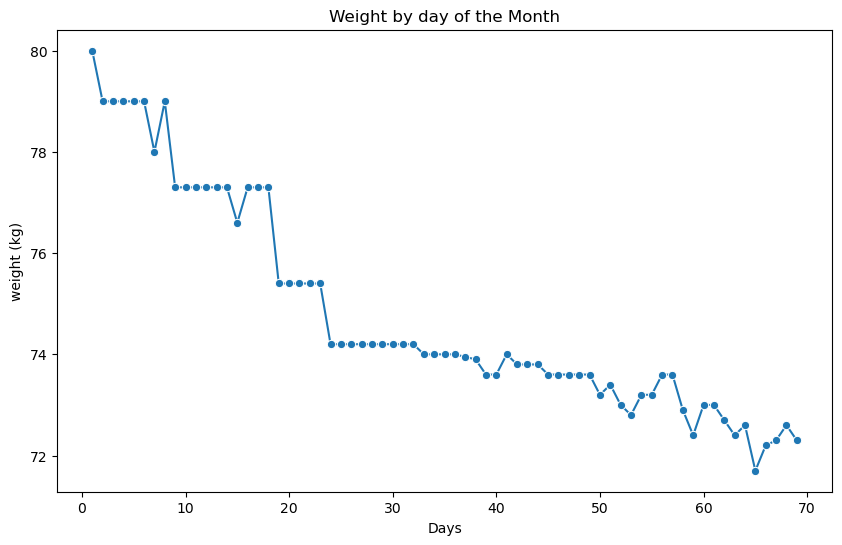

In [107]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Days",y="Weight",data=df,marker="o")
plt.title("Weight by day of the Month")
plt.ylabel("weight (kg)")
plt.show()

In [108]:
df.tail()

,Date,Weight,Days,year,month
65,2024-08-06,71.7,65,2024,8
66,2024-08-07,72.2,66,2024,8
67,2024-08-08,72.3,67,2024,8
68,2024-08-09,72.6,68,2024,8
69,2024-08-10,72.3,69,2024,8


In [109]:
X= df[["Weight"]]
y= df[["Days"]]

X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:

y_pred_elasticnet = elasticnet.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("\nElasticNet Regression")
print(f"Mean Squared Error: {mse_elasticnet}")
print(f"R-squared: {r2_elasticnet}")



ElasticNet Regression
Mean Squared Error: 50.15385460727151
R-squared: 0.8611893259665727


In [115]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [112]:
y_pred_elasticnet = elasticnet.predict(X_test)

# Evaluate the model
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("\nElasticNet Regression")
print(f"Mean Squared Error: {mse_elasticnet}")
print(f"R-squared: {r2_elasticnet}")



ElasticNet Regression
Mean Squared Error: 50.15385460727151
R-squared: 0.8611893259665727


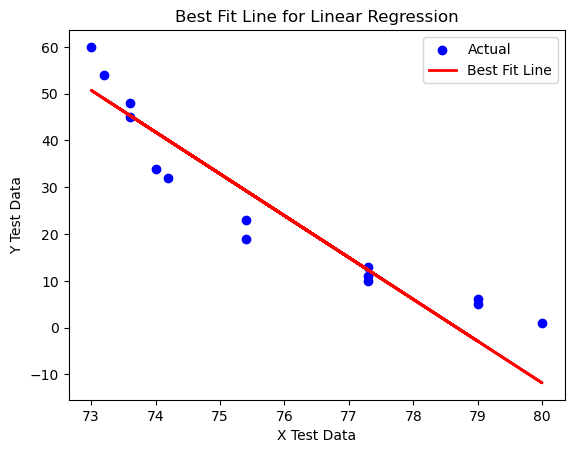

In [117]:

plt.scatter(X_test, y_test, color='blue', label='Actual')

plt.plot(X_test, y_pred_elasticnet, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('X Test Data')
plt.ylabel('Y Test Data')
plt.title('Best Fit Line for Linear Regression')
plt.legend()

plt.show()


In [124]:
new_weight = 66.9 
predicted_days = elasticnet.predict([[new_weight]])

predicted_date = df['Date'].min() + pd.to_timedelta(int(predicted_days[0]), unit='D')

print(f"Predicted date for {new_weight} kg is {predicted_date.strftime('%d-%b-%Y')}")


Predicted date for 66.9 kg is 16-Sep-2024
